/home/renangas/Documents/Github Projects/rrslvq
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).


IndexError: index 8 is out of bounds for axis 0 with size 8

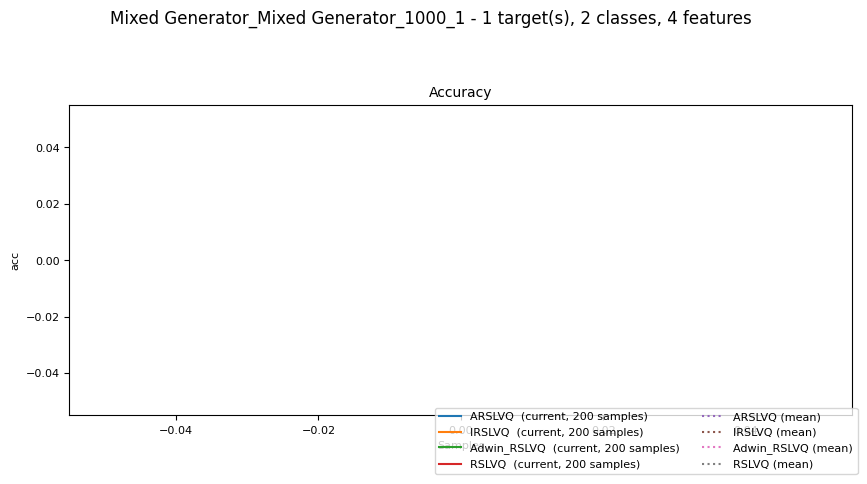

In [7]:
import sys
import os

parent_dir = os.path.dirname(os.path.realpath("/home/renangas/Documents/Github Projects/rrslvq/plots"))
print(parent_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from skmultiflow.data.mixed_generator import MIXEDGenerator
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from study.reoccuring_drift_stream import ReoccuringDriftStream
from rrslvq import ReactiveRobustSoftLearningVectorQuantization
from skmultiflow.lazy import KNN
from skmultiflow.meta.oza_bagging_adwin import OzaBaggingAdwin
from skmultiflow.trees.hoeffding_adaptive_tree import HAT
from skmultiflow.lazy.sam_knn import SAMKNN
from skmultiflow.meta.adaptive_random_forests import AdaptiveRandomForest

import warnings

warnings.filterwarnings('ignore')

n_prototypes_per_class = 4
sigma = 6
arslvq = ReactiveRobustSoftLearningVectorQuantization(prototypes_per_class=n_prototypes_per_class,drift_detector="KS",confidence=0.05,sigma=sigma)
rrslvq = ReactiveRobustSoftLearningVectorQuantization(prototypes_per_class=n_prototypes_per_class,drift_detector="KS",confidence=0.1,sigma=sigma)
irslvq = ReactiveRobustSoftLearningVectorQuantization(prototypes_per_class=n_prototypes_per_class,drift_detector="KS",confidence=0.05,sigma=sigma,replace=False)
adwin = ReactiveRobustSoftLearningVectorQuantization(prototypes_per_class=n_prototypes_per_class,drift_detector="ADWIN",confidence=0.05,sigma=sigma,replace=False)
rslvq = ReactiveRobustSoftLearningVectorQuantization(prototypes_per_class=n_prototypes_per_class,sigma=sigma)
cls = [arslvq,irslvq,adwin,rslvq]
detectors = ["ARSLVQ","IRSLVQ","Adwin_RSLVQ","RSLVQ"]

s1 = MIXEDGenerator(classification_function = 1, random_state= 112, balance_classes = False)
s2 = MIXEDGenerator(classification_function = 0, random_state= 112, balance_classes = False)
stream = ReoccuringDriftStream(stream=s1, drift_stream=s2,random_state=None,alpha=90.0, position=2000,width=1,pause = 1000)
stream.prepare_for_use()


evluator = EvaluatePrequential(batch_size=10,max_samples=10000,show_plot=True,metrics=['accuracy'])

evluator.evaluate(stream=stream,model=cls,model_names=detectors)


arslvq = ARSLVQ(prototypes_per_class=n_prototypes_per_class,drift_detector="KS",confidence=0.05,sigma=sigma)
oza = OzaBaggingAdwin(base_estimator=KNN())
adf = AdaptiveRandomForest()
samknn = SAMKNN()
hat = HAT()
cls = [arslvq,oza,adf,samknn,hat]
detectors = ["ARSLVQ","OzaAdwin","ADF","SamKNN","HAT"]

s1 = MIXEDGenerator(classification_function = 1, random_state= 112, balance_classes = False)
s2 = MIXEDGenerator(classification_function = 0, random_state= 112, balance_classes = False)

stream = ReoccuringDriftStream(stream=s1, drift_stream=s2,random_state=None,alpha=90.0, position=2000,width=1,pause = 1000)
stream.prepare_for_use()


evluator = EvaluatePrequential(batch_size=10,max_samples=10000,show_plot=True,metrics=['accuracy'],)

evluator.evaluate(stream=stream,model=cls,model_names=detectors)

